In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/application_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/application_train.csv'

In [ ]:
df.shape

(225218, 122)

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225213,360861,0,Revolving loans,F,Y,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
225214,360862,0,Cash loans,F,N,Y,0,337500.0,450000.0,16965.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
225215,360863,0,Cash loans,F,N,Y,0,63000.0,277969.5,10111.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225216,360865,0,Revolving loans,F,N,Y,0,135000.0,202500.0,10125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
len(df) ###size of the dataset

225218

In [ ]:
df.SK_ID_CURR

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007
...,...
225213,360861
225214,360862
225215,360863
225216,360865


In [ ]:
df['TARGET'].mean()*100 ##default rate


np.float64(8.109920166238933)

In [ ]:
category_counts=df['TARGET'].value_counts()

In [ ]:
import matplotlib.pyplot as plt


<Axes: xlabel='TARGET'>

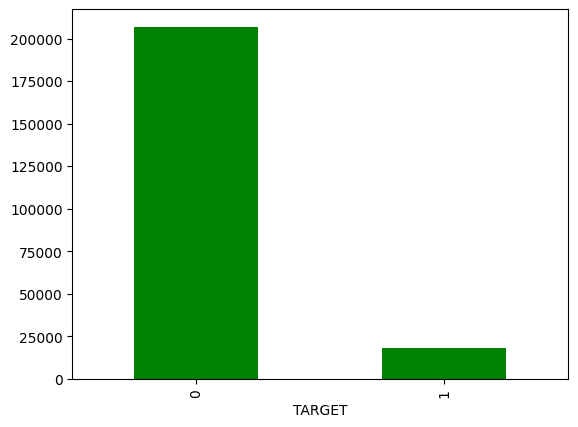

In [ ]:
category_counts.plot(kind='bar',color=['green'])

In [ ]:
loan_counts=df['NAME_CONTRACT_TYPE'].value_counts()
print(loan_counts)

NAME_CONTRACT_TYPE
Cash loans         203848
Revolving loans     21370
Name: count, dtype: int64


<Axes: xlabel='NAME_CONTRACT_TYPE'>

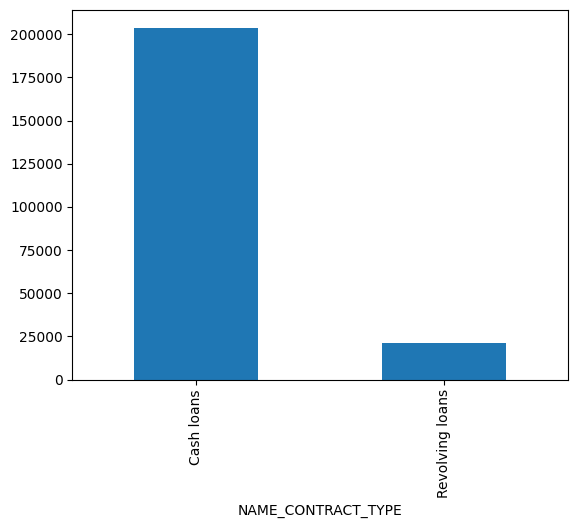

In [ ]:
loan_counts.plot(kind='bar')

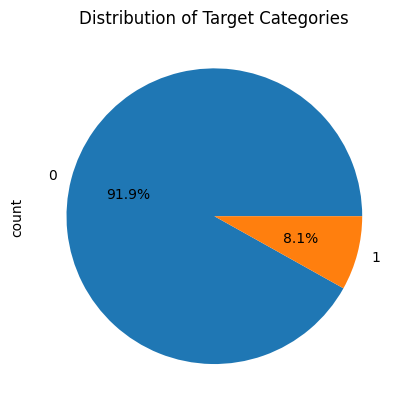

In [ ]:
category_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Target Categories')
plt.show()

In [ ]:
default_rate = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
default_rate.columns = ['Loan Type', 'Default Rate']

print(default_rate)

         Loan Type  Default Rate
0       Cash loans      0.083793
1  Revolving loans      0.055405


In [ ]:
fig = px.bar(
    default_rate,
    x='Loan Type',
    y='Default Rate',
    title='Default Rate by Loan Type',
    text_auto='.2%',
    color='Loan Type'
)
fig.show()

Text(0, 0.5, 'Number of Applicants')

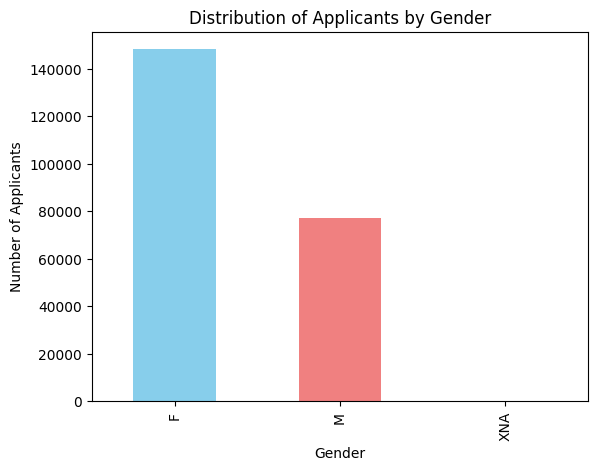

In [ ]:
gender_counts = df['CODE_GENDER'].value_counts()
gender_counts.plot(kind='bar', title='Distribution of Applicants by Gender', color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')

In [ ]:
gender_default_rate = df.groupby('CODE_GENDER')['TARGET'].mean().reset_index()
gender_default_rate.columns = ['Gender', 'Default Rate']


In [ ]:
fig = px.bar(
    gender_default_rate,
    x='Gender',
    y='Default Rate',
    title='Default Rate by Gender',
    text_auto='.2%',
    color='Gender'
)

fig.show()

In [ ]:
### 2nd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Age Distribution of Applicants (Grouped)')
plt.show()


NameError: name 'df' is not defined